> **Pre-Introduction**: Welcome to the Investigate a Dataset project! In this project we will analysis whether movie's budget, director and runtime has an impact on revenue.

# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [44]:
# Specific import statements were used to import relevant packages for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
import seaborn as sns
%matplotlib inline

In [45]:
# Data was loaded and was printed out with few lines to acknowledge the data table.
movies = pd.read_csv("tmdb-movies.csv")
movies


id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                NaN         Bruce Brown   
10862                                                NaN  John Frankenheimer   
10863                                                NaN      Eldar Ryazanov   
10864                                                NaN         Woody Allen   
10865                                                NaN    Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      Thirty years after defeating the Galactic E

In [3]:
# Find out how many rows and columns there are in the table
movies.shape


(10866, 21)

In [4]:
# Get overview of the data set,
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

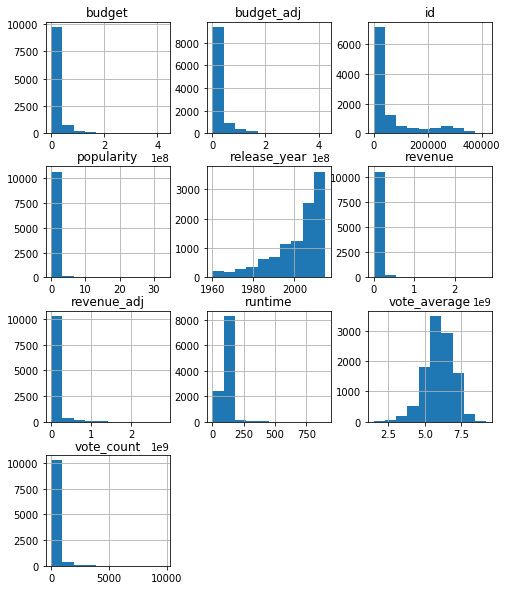

In [8]:
# From our analysis of using info() statement, we found out we have 10 numeric columns (4 float and 6 integer)
# Thus, we should see 10 histograms
movies.hist(figsize=(8,10));
# Right Skewed: budget, budget_adj, revenue, revenue_adj, runtime

In [66]:
#  looked for instances of missing or possibly errant data.
#  From the data, the column with most null-values were "hompage", "tagline" and "keywords" and "production companies".
#  These columns will not be used because they had large number of nulls and it is irrelivent to the analysis we will implement.
#  The other null values will be dealt with later on when triming data.
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Average: budget = 14.63 million, revenue = $39.82 million
# Adjecent Average (taking into account inflation): budget = 17.55 million, revenue = $51.36 million
# Most expensive and successfull to date: Budget = 425.00 million, revenue = $2781.51 million
movies.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

# Data Wrapping

In [46]:
# Drop 4 irrelivent columns
movies.drop(["homepage","tagline","keywords","production_companies"], axis=1, inplace = True)

In [4]:
# Cheak if changes were made, changes were made as new tables includes 17 columns from original 21 columns
movies.head(3)
movies.shape

(10866, 17)

In [47]:
# Then use the new trimed titles column is used to remove duplicates so same movie do not appear more than once 
# New row total is 10571
movies.drop_duplicates(subset = 'id',keep = 'first')
movies;

In [48]:
movies.drop_duplicates(subset = 'imdb_id',keep = 'first')
movies;

In [103]:
# Budget column was sorted to find out the minimum cost 
# We see that there are movies with 0 budget and even 0 revenue.
movies.sort_values('budget')
movies.sort_values('revenue')
# I tried to find out if there were other columns with zero values and it was runtime
# It is very strange that a movie was made with 0 runtime. Most likely it is postponed or unfinished movie.
movies.sort_values('runtime')

id    imdb_id  popularity  budget    revenue  \
410   339342  tt2948712    0.097514       0          0   
3857  289097  tt1288636    0.095583       0          0   
2370  127717  tt1525359    0.081892       0          0   
2315   48373  tt1274296    0.171615       0          0   
3884  105885  tt1754944    0.045198       0          0   
...      ...        ...         ...     ...        ...   
6181   18729  tt0088583    0.000065       0          0   
6176   42044  tt0090015    0.147489       0          0   
2722  331214  tt0185906    0.537593       0  125000000   
4041  150004  tt0289830    0.469332       0          0   
3894  125336  tt2044056    0.006925       0          0   

                     original_title  \
410                  Anarchy Parlor   
3857                       Cell 213   
2370                Freshman Father   
2315           Listen to Your Heart   
3884                         eCupid   
...                             ...   
6181        North and South, Book I   
6176                          Shoah   
2722               Band of Brothers   
4041                          Taken   
3894  The Story of Film: An Odyssey   

                                                   cast  \
410   Robert LaSardo|Jordan James Smith|Sara Fabel|T...   
3857  Bruce Greenwood|Eric Balfour|Michael Rooker|De...   
2370  Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...   
2315  Alexia Rasmussen|Kent Moran|Cybill Shepherd|Sh...   
3884  Houston Rhines|Andy Anderson|John Callahan|Gal...   
...                                                 ...   
6181  Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...   
6176      Simon Srebnik|Michael Podchlebnik|Motke Zaidl   
2722  Damian Lewis|Ron Livingston|Frank John Hughes|...   
4041  Dakota Fanning|Matt Frewer|Eric Close|Emily Be...   
3894  Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...   

                                               director  \
410                              Kenny Gage|Devon Downs   
3857                                        Stephen Kay   
2370                                      Michael Scott   
2315                                                NaN   
3884                                      J.C. Calciano   
...                                                 ...   
6181                                                NaN   
6176                                    Claude Lanzmann   
2722  Phil Alden Robinson|Richard Loncraine|Mikael S...   
4041  Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...   
3894                                       Mark Cousins   

                                               overview  runtime  \
410   Six young college hopefuls vacationing and par...        0   
3857  Cocky young attorney Michael Gray finds himsel...        0   
2370                                                NaN        0   
2315  Danny Foster doesn't have much: an apartment a...        0   
3884  From the director of Is It Just Me? comes this...        0   
...                                                 ...      ...   
6181  Two friends, one northern and one southern, st...      561   
6176  Claude Lanzmann directed this 9 1/2 hour docum...      566   
2722  Drawn from interviews with survivors of Easy C...      705   
4041  Taken spans five decades and four generations,...      877   
3894  The Story of Film: An Odyssey, written and dir...      900   

                     genres release_date  vote_count  vote_average  \
410                  Horror       1/1/15          15           5.6   
3857                 Horror      6/10/11          13           5.2   
2370                    NaN       6/5/10          12           5.8   
2315    Drama|Music|Romance      8/14/10          29           7.3   
3884                Romance      6/23/11          12           4.6   
...                     ...          ...         ...           ...   
6181  Drama|History|Western      11/3/85          17           6.0   
6176            Documentary      11/1/85         

In [49]:
#So,we need to remove rows with 0 value in budget, revenue and runtime and 
# it is highly unlikely that a movie is made with 0 value of any of these columns.
new_movies = movies[movies.loc[:]!= 0]

In [25]:
#Now, when we check there is no zero value for any
new_movies.sort_values('budget')
new_movies.sort_values('revenue')
new_movies.sort_values('runtime')
# But there are still null values.

id    imdb_id  popularity       budget       revenue  \
3581   59296  tt1436559    0.520430          1.0  1.378000e+03   
2618   39964  tt0120836    0.090186          1.0  1.000000e+02   
8944   14373  tt0082250    0.464188          2.0  1.600000e+01   
10050  20701  tt0100740    0.317091          3.0  1.600000e+01   
2398   39356  tt1560139    0.028456          3.0  4.300000e+01   
...      ...        ...         ...          ...           ...   
6570    1452  tt0348150    1.957331  270000000.0  3.910812e+08   
14     99861  tt2395427    5.944927  280000000.0  1.405036e+09   
7387     285  tt0449088    4.965391  300000000.0  9.610000e+08   
3375    1865  tt1298650    4.955130  380000000.0  1.021683e+09   
2244   46528  tt1032751    0.250540  425000000.0  1.108757e+07   

                                    original_title  \
3581                       Love, Wedding, Marriage   
2618                                  Lost & Found   
8944                                  Death Wish 2   
10050           Tales from the Darkside: The Movie   
2398                                           Boy   
...                                            ...   
6570                              Superman Returns   
14                         Avengers: Age of Ultron   
7387      Pirates of the Caribbean: At World's End   
3375   Pirates of the Caribbean: On Stranger Tides   
2244                             The Warrior's Way   

                                                    cast         director  \
3581   Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...  Dermot Mulroney   
2618   David Spade|Sophie Marceau|Ever Carradine|Step...     Jeff Pollack   
8944   Charles Bronson|Jill Ireland|Vincent Gardenia|...   Michael Winner   
10050  Rae Dawn Chong|Christian Slater|Deborah Harry|...    John Harrison   
2398   James Rolleston|Craig Hall|Taika Waititi|Te Ah...    Taika Waititi   
...                                                  ...              ...   
6570   Brandon Routh|Kevin Spacey|Kate Bosworth|James...     Bryan Singer   
14     Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...      Joss Whedon   
7387   Johnny Depp|Orlando Bloom|Keira Knightley|Geof...   Gore Verbinski   
3375   Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...     Rob Marshall   
2244   Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...       Sngmoo Lee   

                                                overview  runtime  \
3581   A happy newlywed marriage counselor's views on...     90.0   
2618   A comedy about finding your true love at any p...     95.0   
8944   Paul Kersey is again a vigilante trying to fin...     88.0   
10050  The first segment features an animated mummy s...     93.0   
2398   It's 1984, and Michael Jackson is king - even ...     87.0   
...                                                  ...      ...   
6570   Set 5 years after the end of Superman II, the ...    154.0   
14     When Tony Stark tries to jumpstart a dormant p...    141.0   
7387   Captain Barbossa, long believed to be dead, ha...    169.0   
3375   Captain Jack Sparrow crosses paths with a woma...    136.0   
2244   An Asian assassin (Dong-gun Jang) is forced to...    100.0   

                                          genres release_date  vote_count  \
3581                              Comedy|Romance       6/3/11          55   
2618                              Comedy|Romance      4/23/99          14   
8944                       Action|Crime|Thriller      2/20/82          27   
10050                      Fantasy|Horror|Comedy       5/3/90          37   
2398                                Drama|Comedy      2/14/10          26   
...                                          ...          ...         ...   
6570    Adventure|Fantasy|Action|Science Fiction      6/28/06         834   
14              Action|Adventure|Science Fiction      4/22/15        4304   
7387                    Adventure|Fantasy|Action      5/19/07        2626   
3375                    Adventure|Action|Fan

In [50]:
# Function to remove zeros
new_movies = new_movies[pd.notnull(new_movies['budget'])]

In [51]:
new_movies = new_movies[pd.notnull(new_movies['revenue'])]

In [52]:
new_movies = new_movies[pd.notnull(new_movies['runtime'])]
new_movies;

In [107]:
#movies.shape had 10866 rows
# New dataframe has 3855 rows
new_movies.shape
#10866 - 1287 = 7011 rows were deleted which had zero values - thats a lot of values there were null/0
# Now we would be working with 3618 rows instead of 10294 rows.

(3855, 17)

In [10]:
# Now, the table should be clean as there are no null values in any 3 columns
# Initially, we had lot of null values but now there is only 4 for cast and 1 for director
new_movies.isna().sum()
new_movies.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              4
director          1
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [32]:
new_movies.describe()

id   popularity        budget       revenue      runtime  \
count    3855.000000  3855.000000  3.855000e+03  3.855000e+03  3855.000000   
mean    39888.783398     1.191400  3.720183e+07  1.076589e+08   109.215824   
std     67213.815955     1.475002  4.220291e+07  1.765248e+08    19.922166   
min         5.000000     0.001117  1.000000e+00  2.000000e+00    15.000000   
25%      6074.000000     0.462448  1.000000e+07  1.357645e+07    95.000000   
50%     11322.000000     0.797298  2.400000e+07  4.479322e+07   106.000000   
75%     38577.000000     1.368245  5.000000e+07  1.241530e+08   119.000000   
max    417859.000000    32.985763  4.250000e+08  2.781506e+09   338.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  3855.000000    3855.00000   3855.000000  3.855000e+03  3.855000e+03  
mean    527.611933       6.16786   2001.263294  4.423630e+07  1.370294e+08  
std     879.868374       0.79504     11.281989  4.480403e+07  2.160944e+08  
min      10.000000       2.20000   1960.000000  9.693980e-01  2.370705e+00  
25%      71.000000       5.70000   1995.000000  1.309053e+07  1.834123e+07  
50%     204.000000       6.20000   2004.000000  3.001558e+07  6.171861e+07  
75%     580.000000       6.70000   2010.000000  6.061307e+07  1.632401e+08  
max    9767.000000       8.40000   2015.000000  4.250000e+08  2.827124e+09

The data has been cleaned to use.

# Revenue and Budget relationship

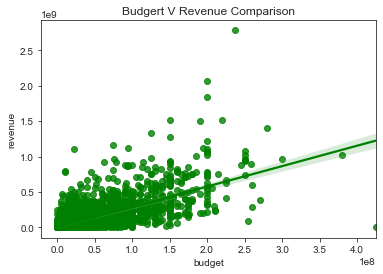

In [11]:
# Scatter plot was used to observe if there was any relationship between the two.
# We can say there is mildly positive relationship between budget and revenue.
# If we ignore the outliers than the positive correlation is slightler higher
# It looks quite strange that there are movies with 0 budget.
sns.set_style('white')
sns.set_style('ticks')

sns.regplot(x='budget',y='revenue',color='g', data=new_movies).set(title='Budgert V Revenue Comparison');

In [53]:
# Categorize movies into flop, average, hit and blockbuster categories.
# The category is defined by using revenue and budget to get return on investment, roi

roi = new_movies['revenue'] / new_movies['budget']
roi


0        10.090192
1         2.522909
2         2.683984
3        10.340891
4         7.927628
           ...    
10822     4.498225
10828     4.333333
10829     1.289491
10835     1.666667
10848     2.346041
Length: 3855, dtype: float64

In [54]:
new_movies["roi"] = roi

In [55]:
new_movies.head(2)

id    imdb_id  popularity       budget       revenue  \
0  135397  tt0369610   32.985763  150000000.0  1.513529e+09   
1   76341  tt1392190   28.419936  150000000.0  3.784364e+08   

       original_title                                               cast  \
0      Jurassic World  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Mad Max: Fury Road  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

          director                                           overview  \
0  Colin Trevorrow  Twenty-two years after the events of Jurassic ...   
1    George Miller  An apocalyptic story set in the furthest reach...   

   runtime                                     genres release_date  \
0    124.0  Action|Adventure|Science Fiction|Thriller       6/9/15   
1    120.0  Action|Adventure|Science Fiction|Thriller      5/13/15   

   vote_count  vote_average  release_year    budget_adj   revenue_adj  \
0        5562           6.5          2015  1.379999e+08  1.392446e+09   
1        6185           7.1          2015  1.379999e+08  3.481613e+08   

         roi  
0  10.090192  
1   2.522909

In [56]:
#So, lower quartile of return_on_investment is 0.87. So,ROI below 0.88 is a failure.
# If movies has ROI around 2.12 then its considered to have average success.
# If a movie has over 4.21 ROI then it is very successful (blucknbuster)
new_movies.roi.quantile([0.25,0.5,0.75])

0.25    0.875929
0.50    2.119489
0.75    4.210158
Name: roi, dtype: float64

In [57]:
roi_conditions = [
    (new_movies['roi'] < 0.87),
    (new_movies['roi'] >= 0.87) & (new_movies['roi'] < 2.12),
    (new_movies['roi'] >= 2.12) & (new_movies['roi'] < 4.21),
    (new_movies['roi'] >= 4.21)
]

In [58]:

verdict = ['flop','average','hit','blockbuster']

In [59]:
new_movies['box_office_verdict'] = np.select(roi_conditions,verdict)
new_movies.head()

id    imdb_id  popularity       budget       revenue  \
0  135397  tt0369610   32.985763  150000000.0  1.513529e+09   
1   76341  tt1392190   28.419936  150000000.0  3.784364e+08   
2  262500  tt2908446   13.112507  110000000.0  2.952382e+08   
3  140607  tt2488496   11.173104  200000000.0  2.068178e+09   
4  168259  tt2820852    9.335014  190000000.0  1.506249e+09   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...    124.0   
1  An apocalyptic story set in the furthest reach...    120.0   
2  Beatrice Prior must confront her inner demons ...    119.0   
3  Thirty years after defeating the Galactic Empi...    136.0   
4  Deckard Shaw seeks revenge against Dominic Tor...    137.0   

                                      genres release_date  vote_count  \
0  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
1  Action|Adventure|Science Fiction|Thriller      5/13/15        6185   
2         Adventure|Science Fiction|Thriller      3/18/15        2480   
3   Action|Adventure|Science Fiction|Fantasy     12/15/15        5292   
4                      Action|Crime|Thriller       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj        roi  \
0           6.5          2015  1.379999e+08  1.392446e+09  10.090192   
1           7.1          2015  1.379999e+08  3.481613e+08   2.522909   
2           6.3          2015  1.012000e+08  2.716190e+08   2.683984   
3           7.5          2015  1.839999e+08  1.902723e+09  10.340891   
4           7.3          2015  1.747999e+08  1.385749e+09   7.927628   

  box_office_verdict  
0        blockbuster  
1                hit  
2                hit  
3        blockbuster  
4        blockbuster

In [60]:
# Median budget of movie is around 24 million and movies over 50 million are high budget movies.
new_movies.budget.quantile([0.25,0.5,0.75])

0.25    10000000.0
0.50    24000000.0
0.75    50000000.0
Name: budget, dtype: float64

In [61]:
budget_conditions = [
    (new_movies['budget'] < 10000000),
    (new_movies['budget'] >= 10000000) & (new_movies['budget'] < 24000000),
    (new_movies['budget'] >= 24000000) & (new_movies['budget'] < 50000000),
    (new_movies['budget'] >= 50000000)
]

In [62]:
budget_class = ['very_low_budget','low_budget','medium_budget','high_budget']

In [63]:
new_movies['budget_class'] = np.select(budget_conditions,budget_class)
new_movies.head()

id    imdb_id  popularity       budget       revenue  \
0  135397  tt0369610   32.985763  150000000.0  1.513529e+09   
1   76341  tt1392190   28.419936  150000000.0  3.784364e+08   
2  262500  tt2908446   13.112507  110000000.0  2.952382e+08   
3  140607  tt2488496   11.173104  200000000.0  2.068178e+09   
4  168259  tt2820852    9.335014  190000000.0  1.506249e+09   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...    124.0   
1  An apocalyptic story set in the furthest reach...    120.0   
2  Beatrice Prior must confront her inner demons ...    119.0   
3  Thirty years after defeating the Galactic Empi...    136.0   
4  Deckard Shaw seeks revenge against Dominic Tor...    137.0   

                                      genres release_date  vote_count  \
0  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
1  Action|Adventure|Science Fiction|Thriller      5/13/15        6185   
2         Adventure|Science Fiction|Thriller      3/18/15        2480   
3   Action|Adventure|Science Fiction|Fantasy     12/15/15        5292   
4                      Action|Crime|Thriller       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj        roi  \
0           6.5          2015  1.379999e+08  1.392446e+09  10.090192   
1           7.1          2015  1.379999e+08  3.481613e+08   2.522909   
2           6.3          2015  1.012000e+08  2.716190e+08   2.683984   
3           7.5          2015  1.839999e+08  1.902723e+09  10.340891   
4           7.3          2015  1.747999e+08  1.385749e+09   7.927628   

  box_office_verdict budget_class  
0        blockbuster  high_budget  
1                hit  high_budget  
2                hit  high_budget  
3        blockbuster  high_budget  
4        blockbuster  high_budget

In [64]:
group = new_movies.groupby(['budget_class','box_office_verdict'])

In [65]:
group.count()

id  imdb_id  popularity  budget  revenue  \
budget_class    box_office_verdict                                              
high_budget     average             323      323         323     323      323   
                blockbuster         160      160         160     160      160   
                flop                177      177         177     177      177   
                hit                 342      342         342     342      342   
low_budget      average             240      240         240     240      240   
                blockbuster         230      230         230     230      230   
                flop                281      281         281     281      281   
                hit                 226      226         226     226      226   
medium_budget   average             268      268         268     268      268   
                blockbuster         175      175         175     175      175   
                flop                249      249         249     249      249   
                hit                 245      245         245     245      245   
very_low_budget average             142      142         142     142      142   
                blockbuster         399      399         399     399      399   
                flop                249      249         249     249      249   
                hit                 149      149         149     149      149   

                                    original_title  cast  director  overview  \
budget_class    box_office_verdict                                             
high_budget     average                        323   323       323       323   
                blockbuster                    160   160       160       160   
                flop                           177   177       177       177   
                hit                            342   342       342       342   
low_budget      average                        240   240       240       240   
                blockbuster                    230   230       230       230   
                flop                           281   281       281       281   
                hit                            226   226       226       226   
medium_budget   average                        268   268       268       268   
                blockbuster                    175   175       175       175   
                flop                           249   249       249       249   
                hit                            245   245       245       245   
very_low_budget average                        142   141       142       142   
                blockbuster                    399   398       399       399   
                flop                           249   247       249       249   
                hit                            149   149       148       149   

                                    runtime  genres  release_date  vote_count  \
budget_class    box_office_verdict                                              
high_budget     average                 323     323           323         323   
                blockbuster             160     160           160         160   
                flop                    177     177           177         177   
                hit                     342     342           342         342   
low_budget      average                 240     240           240         240   
                blockbuster             230     230           230         230   
                flop                    281     281           281         281   
                hit                     226     226           226         226   
medium_budget   average                 268     268           268         268   
                blockbuster             175     175           175         175   
                flop                    249     249           249         249   
                hit                     245     245           245         245   
ver

###                                            Director Analysis


In [66]:
# create count of directors
value_count = new_movies['director'].value_counts()

In [67]:
# create count df less than 6
to_remove = value_count[value_count <=5].index

In [68]:
new_movies_director = new_movies[~new_movies.director.isin(to_remove)]

In [69]:
# Now, we want to find out if movies made by specific directors had certain success.
director = new_movies_director.groupby(by='director').agg('count').roi.sort_values(ascending = True)

In [70]:
director.head(10)

director
Adam McKay            6
Dwight H. Little      6
Francis Lawrence      6
Frank Coraci          6
Gary Fleder           6
George Lucas          6
George Miller         6
Guillermo del Toro    6
James Mangold         6
James Wan             6
Name: roi, dtype: int64

In [71]:
director_history = new_movies_director[new_movies_director['director'] == 'James Wan']
director_history.head(21)

id    imdb_id  popularity       budget       revenue  \
4     168259  tt2820852    9.335014  190000000.0  1.506249e+09   
1964   49018  tt1591095    1.396973    1500000.0  9.700915e+07   
5438  138843  tt1457767    3.472358   13000000.0  3.180001e+08   
7011     176  tt0387564    1.309753    1200000.0  1.039117e+08   
7566   11835  tt0804461    0.470629   20000000.0  1.697446e+07   
7675   14001  tt0455760    0.258046   20000000.0  2.221741e+07   

      original_title                                               cast  \
4          Furious 7  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
1964       Insidious  Patrick Wilson|Rose Byrne|Barbara Hershey|Leig...   
5438   The Conjuring  Patrick Wilson|Vera Farmiga|Ron Livingston|Lil...   
7011             Saw  Cary Elwes|Danny Glover|Monica Potter|Michael ...   
7566  Death Sentence  Kevin Bacon|Garrett Hedlund|Kelly Preston|Jord...   
7675    Dead Silence  Ryan Kwanten|Donnie Wahlberg|Bob Gunton|Amber ...   

       director                                           overview  runtime  \
4     James Wan  Deckard Shaw seeks revenge against Dominic Tor...    137.0   
1964  James Wan  A family discovers that dark spirits have inva...    103.0   
5438  James Wan  Paranormal investigators Ed and Lorraine Warre...    112.0   
7011  James Wan  Obsessed with teaching his victims the value o...    103.0   
7566  James Wan  Nick Hume is a mild-mannered executive with a ...    105.0   
7675  James Wan  Jamie returns to his hometown in search of ans...     89.0   

                           genres release_date  vote_count  vote_average  \
4           Action|Crime|Thriller       4/1/15        2947           7.3   
1964              Horror|Thriller      9/13/10         999           6.7   
5438              Horror|Thriller      7/18/13        1910           7.4   
7011         Horror|Mystery|Crime      10/1/04        1135           7.1   
7566  Action|Crime|Drama|Thriller      8/31/07         148           6.5   
7675                       Horror      3/16/07         264           6.2   

      release_year    budget_adj   revenue_adj        roi box_office_verdict  \
4             2015  1.747999e+08  1.385749e+09   7.927628        blockbuster   
1964          2010  1.500000e+06  9.700915e+07  64.672767        blockbuster   
5438          2013  1.216843e+07  2.976587e+08  24.461549        blockbuster   
7011          2004  1.385334e+06  1.199603e+08  86.593058        blockbuster   
7566          2007  2.103337e+07  1.785151e+07   0.848723               flop   
7675          2007  2.103337e+07  2.336535e+07   1.110870            average   

         budget_class  
4         high_budget  
1964  very_low_budget  
5438       low_budget  
7011  very_low_budget  
7566       low_budget  
7675       low_budget

# Runtime Analysis

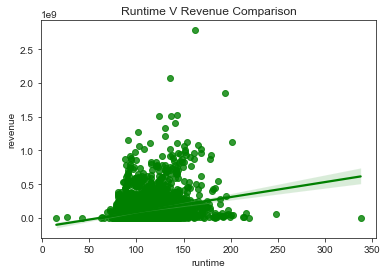

In [72]:
# Scatter plot was used to observe if there was any relationship between the two.
# We can say there is mildly positive relationship between budget and revenue.
# If we ignore the outliers than the positive correlation is slightler higher
# It looks quite strange that there are movies with 0 budget.
sns.set_style('white')
sns.set_style('ticks')

sns.regplot(x='runtime',y='revenue',color='g', data=new_movies).set(title='Runtime V Revenue Comparison');

In [73]:
#So, lower quartile of return_on_investment is 0.87. So,ROI below 0.88 is a failure.
# If movies has ROI around 2.12 then its considered to have average success.
# If a movie has over 4.21 ROI then it is very successful (blucknbuster)
new_movies.runtime.quantile([0.25,0.5,0.75])

0.25     95.0
0.50    106.0
0.75    119.0
Name: runtime, dtype: float64

In [80]:
runtime_conditions = [
    (new_movies['runtime'] < 95.0),
    (new_movies['runtime'] >= 95.0) & (new_movies['runtime'] < 106.0),
    (new_movies['runtime'] >= 106.0) & (new_movies['runtime'] < 119.0),
    (new_movies['runtime'] >= 119.0)
]

In [81]:
movies.runtime.mean()

102.07086324314375

In [82]:
runtime_class = ['short','medium','long','very_long']

In [83]:
new_movies['runtime_class'] = np.select(runtime_conditions,runtime_class)
new_movies.head()

id    imdb_id  popularity       budget       revenue  \
0  135397  tt0369610   32.985763  150000000.0  1.513529e+09   
1   76341  tt1392190   28.419936  150000000.0  3.784364e+08   
2  262500  tt2908446   13.112507  110000000.0  2.952382e+08   
3  140607  tt2488496   11.173104  200000000.0  2.068178e+09   
4  168259  tt2820852    9.335014  190000000.0  1.506249e+09   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            overview  runtime  ...  \
0  Twenty-two years after the events of Jurassic ...    124.0  ...   
1  An apocalyptic story set in the furthest reach...    120.0  ...   
2  Beatrice Prior must confront her inner demons ...    119.0  ...   
3  Thirty years after defeating the Galactic Empi...    136.0  ...   
4  Deckard Shaw seeks revenge against Dominic Tor...    137.0  ...   

  release_date vote_count  vote_average  release_year    budget_adj  \
0       6/9/15       5562           6.5          2015  1.379999e+08   
1      5/13/15       6185           7.1          2015  1.379999e+08   
2      3/18/15       2480           6.3          2015  1.012000e+08   
3     12/15/15       5292           7.5          2015  1.839999e+08   
4       4/1/15       2947           7.3          2015  1.747999e+08   

    revenue_adj        roi  box_office_verdict budget_class runtime_class  
0  1.392446e+09  10.090192         blockbuster  high_budget     very_long  
1  3.481613e+08   2.522909                 hit  high_budget     very_long  
2  2.716190e+08   2.683984                 hit  high_budget     very_long  
3  1.902723e+09  10.340891         blockbuster  high_budget     very_long  
4  1.385749e+09   7.927628         blockbuster  high_budget     very_long  

[5 rows x 21 columns]

In [84]:
runtime_group = new_movies.groupby(['runtime_class','box_office_verdict'])

In [79]:
runtime_group.count()

id  imdb_id  popularity  budget  revenue  \
runtime_class box_office_verdict                                              
long          average             230      230         230     230      230   
              blockbuster         172      172         172     172      172   
              flop                159      159         159     159      159   
              hit                 208      208         208     208      208   
medium        average             249      249         249     249      249   
              blockbuster         221      221         221     221      221   
              flop                273      273         273     273      273   
              hit                 232      232         232     232      232   
short         average             342      342         342     342      342   
              blockbuster         393      393         393     393      393   
              flop                416      416         416     416      416   
              hit                 341      341         341     341      341   
very_long     average             152      152         152     152      152   
              blockbuster         178      178         178     178      178   
              flop                108      108         108     108      108   
              hit                 181      181         181     181      181   

                                  original_title  cast  director  overview  \
runtime_class box_office_verdict                                             
long          average                        230   230       230       230   
              blockbuster                    172   172       172       172   
              flop                           159   159       159       159   
              hit                            208   208       208       208   
medium        average                        249   249       249       249   
              blockbuster                    221   221       221       221   
              flop                           273   273       273       273   
              hit                            232   232       232       232   
short         average                        342   342       342       342   
              blockbuster                    393   392       393       393   
              flop                           416   414       416       416   
              hit                            341   341       341       341   
very_long     average                        152   151       152       152   
              blockbuster                    178   178       178       178   
              flop                           108   108       108       108   
              hit                            181   181       180       181   

                                  runtime  genres  release_date  vote_count  \
runtime_class box_office_verdict                                              
long          average                 230     230           230         230   
              blockbuster             172     172           172         172   
              flop                    159     159           159         159   
              hit                     208     208           208         208   
medium        average                 249     249           249         249   
              blockbuster             221     221           221         221   
              flop                    273     273           273         273   
              hit                     232     232           232         232   
short         average                 342     342           342         342   
              blockbuster             393     393           393         393   
              flop                    416     416           416         416   
              hit                     341     341           341         341   
very_long     average                 152     152           152         152   
              blockbus